**Notebook to download and make some basic analysis of line data from the public releases of the ALMA-IMF Large Program**\
Line data releases are hosted by Harvard's Dataverse service:\
https://dataverse.harvard.edu/dataverse/alma-imf 

In [16]:
from os import path
import numpy as np
import astropy.units as u
from astropy.io import fits
from spectral_cube import SpectralCube
import regions

In [2]:
data_path = '/home/roberto/ALMA_IMF/ionized_He/data'
file_C18O = path.join(data_path,'G012.80_B6_spw4_12M_spw4.JvM.image.pbcor.statcont.contsub.fits')
file_H30a = path.join(data_path,'G012.80_B3_spw1_12M_h41a.JvM.image.contsub.fits')
nu_C180 = 2.195603541e11*u.Hz
nu_H30a = 2.31900939e+11*u.Hz

In [3]:
'''
# Only needed if one wants to change the reference frequency in the header
data_path = '/home/roberto/ALMA_IMF/ionized_He/data'
cubefile = 'G012.80_B6_spw5_12M_spw5.JvM.image.pbcor.statcont.contsub.fits'
cube_path = os.path.join(data_path, cubefile)
fits.setval(cube_path, 'RESTFRQ', value=nu_Heplus[1].value, ext=0)
test = fits.getheader(cube_path)
print(test['RESTFRQ'])
''';

In [4]:
# Read in cube and print rest frequency
cube_C18O = SpectralCube.read(file_C18O)
cube_C18O.allow_huge_operations=True
print(cube_C18O.header['RESTFRQ'])
#shape = cube_C18O.shape
#print(shape)
print(cube_C18O)

219560000000.0
SpectralCube with shape=(959, 727, 736) and unit=Jy / beam:
 n_x:    736  type_x: RA---SIN  unit_x: deg    range:   273.535293 deg:  273.576069 deg
 n_y:    727  type_y: DEC--SIN  unit_y: deg    range:   -17.948379 deg:  -17.910063 deg
 n_s:    959  type_s: FREQ      unit_s: Hz     range: 219474487528.053 Hz:219591417100.800 Hz


In [5]:
help(cube_C18O)

Help on SpectralCube in module spectral_cube.spectral_cube object:

class SpectralCube(BaseSpectralCube, spectral_cube.base_class.BeamMixinClass)
 |  SpectralCube(*args, **kwargs)
 |  
 |  Method resolution order:
 |      SpectralCube
 |      BaseSpectralCube
 |      spectral_cube.base_class.BaseNDClass
 |      spectral_cube.base_class.MaskableArrayMixinClass
 |      spectral_cube.base_class.SpectralAxisMixinClass
 |      spectral_cube.base_class.SpatialCoordMixinClass
 |      spectral_cube.base_class.HeaderMixinClass
 |      spectral_cube.base_class.BeamMixinClass
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data, wcs, mask=None, meta=None, fill_value=nan, header=None, allow_huge_operations=False, beam=None, wcs_tolerance=0.0, use_dask=False, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  with_beam(self, beam, raise_error_jybm=True)
 |      Attach a beam object to the `~SpectralCube`.
 |      
 |      Paramet

INFO: Auto-setting vmin to -7.712e-01 [aplpy.core]
INFO: Auto-setting vmax to  9.817e-01 [aplpy.core]


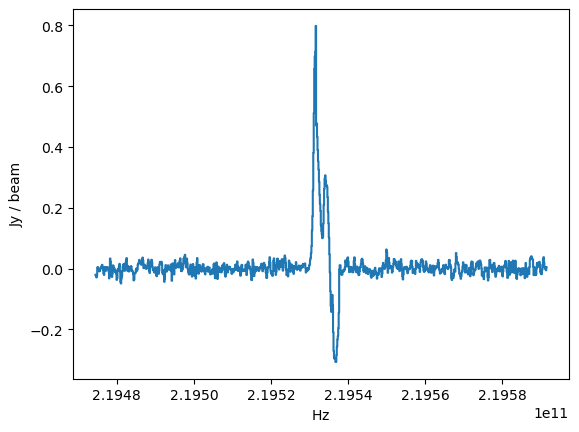

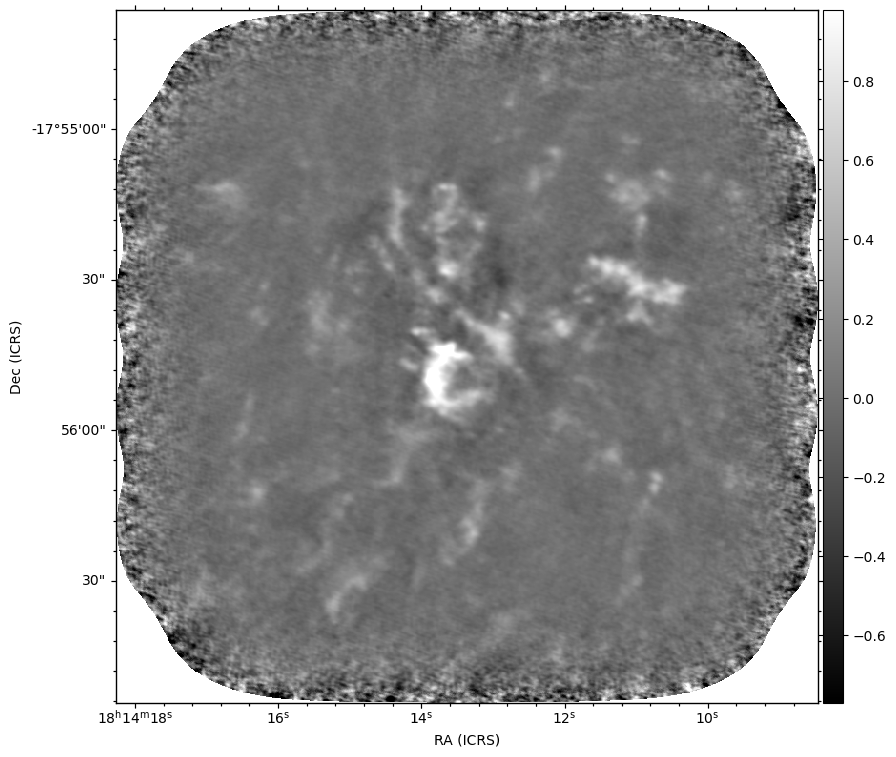

In [6]:
# Let's make a quick look at one spectrum and one slice of the data
cube_C18O[:,365,365].quicklook()
spectrum = cube_C18O[:,365,365]
sp_peak = spectrum.argmax()
cube_C18O[sp_peak,:,:].quicklook()

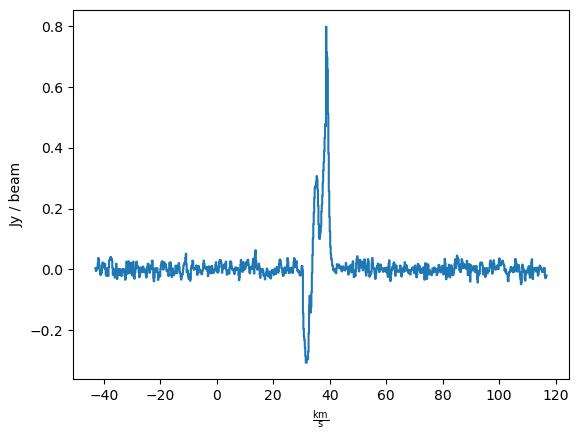

In [7]:
# Sometimes it's more useful to plot spectra in velocity units
cube_C18O = cube_C18O.with_spectral_unit(u.km / u.s, velocity_convention='radio')
cube_C18O[:,365,365].quicklook()

In [28]:
# Also, it is often better to work with only a cutout of the cube
# In this example we define a CRTF region as a string. One can also use DS9 regions or region files. 
ra_center = cube_C18O.header['CRVAL1']
dec_center = cube_C18O.header['CRVAL2']
crop_size = 30/3600 #deg
region_str = f"icrs; box {ra_center} {dec_center} {crop_size} {crop_size} 0"
subcube_C18O = cube_C18O.subcube_from_ds9region(region_str)  
subcube_C18O = subcube_C18O.spectral_slab(20 * u.km / u.s, 60 * u.km / u.s)  
#region_str = f"circle[[{ra_center}deg, {dec_center}deg], {crop_size}deg], coord=icrs, range=[20km/s, 60km/s]"
#sub_cube_C18O = cube_C18O.subcube_from_crtfregion(region_str)  
print(subcube_C18O)

SpectralCube with shape=(241, 157, 157) and unit=Jy / beam:
 n_x:    157  type_x: RA---SIN  unit_x: deg    range:   273.551381 deg:  273.560035 deg
 n_y:    157  type_y: DEC--SIN  unit_y: deg    range:   -17.933339 deg:  -17.925105 deg
 n_s:    241  type_s: VRAD      unit_s: km / s  range:       19.932 km / s:      59.930 km / s


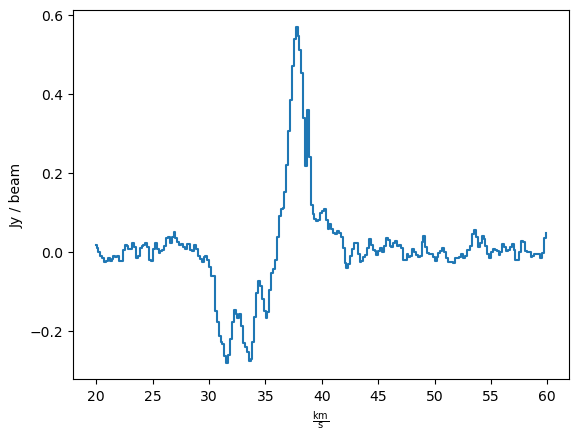

In [62]:
# Let's make a quick look at one spectrum and one slice of the data
subcube_C18O[:,68,68].quicklook()
spectrum = subcube_C18O[:,68,68]

[<WCSAxes: title={'center': '38.265 km / s'}>,
 <WCSAxes: title={'center': '38.431 km / s'}>,
 <WCSAxes: title={'center': '38.598 km / s'}>,
 <WCSAxes: title={'center': '38.765 km / s'}>,
 <WCSAxes: title={'center': '38.931 km / s'}>,
 <WCSAxes: title={'center': '39.098 km / s'}>,
 <WCSAxes: title={'center': '39.265 km / s'}>,
 <WCSAxes: title={'center': '39.431 km / s'}>,
 <WCSAxes: title={'center': '39.598 km / s'}>]

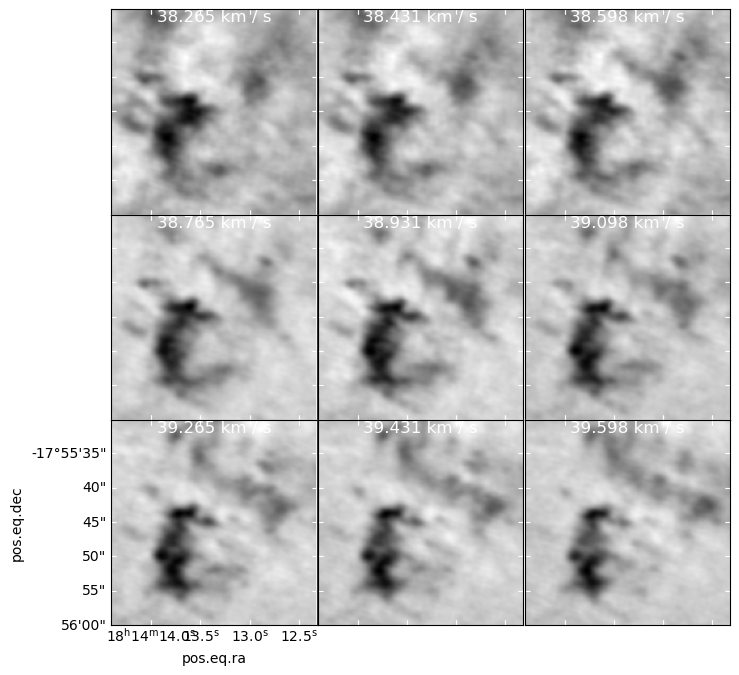

In [60]:
#help(subcube_C18O.plot_channel_maps)
subcube_C18O.plot_channel_maps(3, 3, list(range(110,119)))

INFO: Auto-setting vmin to -2.244e+00 [aplpy.core]
INFO: Auto-setting vmax to  4.045e+00 [aplpy.core]


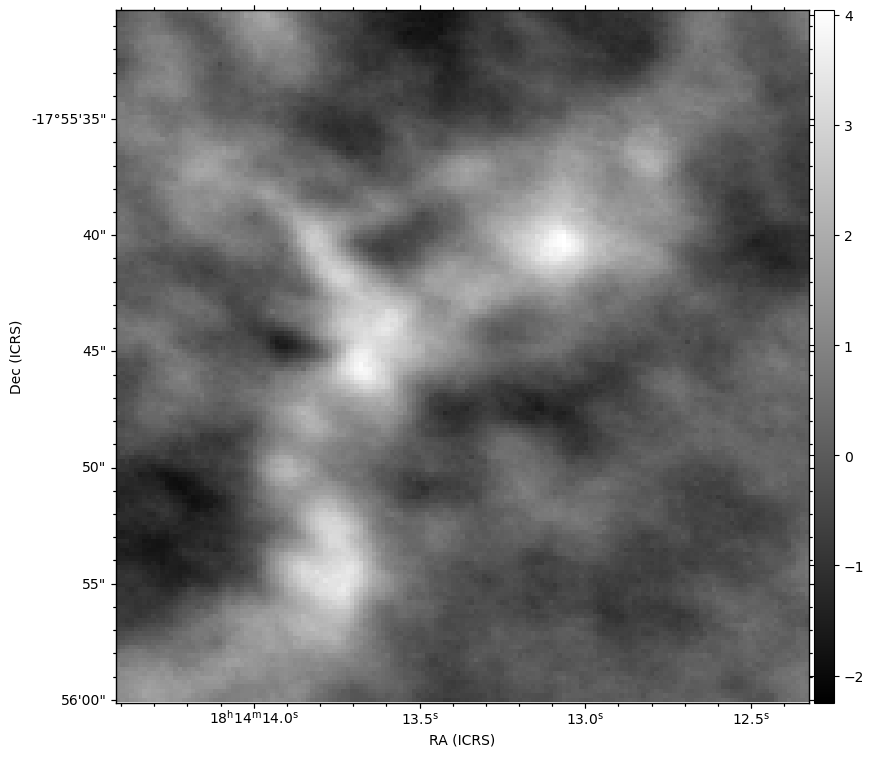

In [63]:
subcube_C18O.moment0(axis=0).quicklook()

In [10]:
cube_C18O.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    3                                                  
NAXIS1  =                  736                                                  
NAXIS2  =                  727                                                  
NAXIS3  =                  959                                                  
BMAJ    = 0.000357780844564170                                                  
BMIN    = 0.000240793776933994                                                  
BPA     =    77.02640267494483                                                  
FILENAME= 'G012.80_B6_spw4_12M_spw4.JvM.image.pbcor.statcont.contsub.fits'      
BUNIT   = 'Jy beam-1'                                                           
SLICE   = '[[(0, 959, None), (42, 769, None), (38, 774, None)]]'                
BEAM    = 'Beam: BMAJ=1.2880